In [36]:
import numpy as np
from random import seed
import copy, random
import time
import subprocess
import matplotlib.pyplot as plt
import numpy as np


types = ["insertionsort.cpp", "mergesort.cpp",
         "qsort.cpp", "nlognqsort.cpp",
         "heapsort.cpp", "stringsort.cpp",
         "stringbinsearchsort.cpp", "skiplistsort.cpp"]

def run_sort(command, input_data):
    res = subprocess.run(command, input=input_data, text=True, stdout=subprocess.PIPE, shell=True)
    return res.stdout

In [37]:
# insertionsort_range range (1, 11000)
# mergesort_range range (1, 100100)
# qsort_range range (1, 100100)
# heapsort_range range (1, 100100)
# stringinsertion
# n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]
# m in [1, 5, 10, 20, 45, 75, 100, 150, 200]

# Поздгрузка информации

In [52]:
insertionsort_range = []
with open("insertion.txt", "r") as f:
    for line in f.readlines():
        insertionsort_range += [float(line)]
f.close()

mergesort_range = []
with open("merge.txt", "r") as f:
    for line in f.readlines():
        mergesort_range += [float(line)]
f.close()

heapsort_range = []
with open("heap.txt", "r") as f:
    for line in f.readlines():
        heapsort_range += [float(line)]
f.close()

qsort_range = []
with open("quicksort.txt", "r") as f:
    for line in f.readlines():
        qsort_range += [float(line)]
f.close()

In [ ]:
# sort_type = 7
# ntests = 10000
# compile_command = f"g++ {types[sort_type]} -o test"
# subprocess.run(compile_command, shell=True)
# exec_command  = "./test"
# skiplist_height_results = []
# for i, n in enumerate([10, 100, 1000, 10000, 100000, 1000000, 3000000]):
#     skiplist_height_results += [[]]
#     for height in range(50):
#         input_data = str(n) + ' ' + str(height + 1)
#         exec_time = run_sort(exec_command, input_data)
#         skiplist_height_results[i] += [float(exec_time)]
# skiplist_height_results 

In [29]:
sort_type = 5
compile_command = f"g++ {types[sort_type]} -o test"
subprocess.run(compile_command, shell=True)
exec_command  = "./test"
for m in [1, 5, 10, 20, 45, 75, 100, 150, 200]:
    for n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]:
        temp = 0
        for test in range(5):
            input_data = str(n) + '\n' + str(m)
            exec_time = run_sort(exec_command, input_data)
            temp += float(exec_time)
        print(round(temp / 5, 12))

3.89986e-05
3.97124e-05
0.0001002306
0.000226568
0.001655972
0.02465436
0.158081
0.5026876
1.03284
5.03734e-05
4.73908e-05
0.0001175706
0.0002979946
0.001870036
0.02889418
0.1815694
0.6155662
1.19295
4.48966e-05
5.61694e-05
0.0001375372
0.0003480268
0.001990834
0.02890774
0.1908614
0.6061186
1.196224
4.39934e-05
4.9746e-05
0.0001142686
0.0002738594
0.00141349
0.0250132
0.1471158
0.4537574
0.990331
3.3389e-05
4.11346e-05
0.0001359878
0.000253248
0.001429554
0.0192729
0.1329952
0.4583022
0.9554582
3.85168e-05
4.52828e-05
0.0001024684
0.0002227654
0.001496286
0.0205206
0.140612
0.4994956
1.021986
3.84038e-05
5.08794e-05
0.0001095558
0.000241779
0.001470638
0.01890174
0.1488258
0.4920532
1.061366
3.69706e-05
4.84044e-05
8.62156e-05
0.000221756
0.001302982
0.02048136
0.155852
0.5039132
1.089328
3.48458e-05
4.75686e-05
8.85168e-05
0.000226273
0.001419874
0.02057534
0.1506132
0.4912466
1.096998


# Insertion Sort Graph

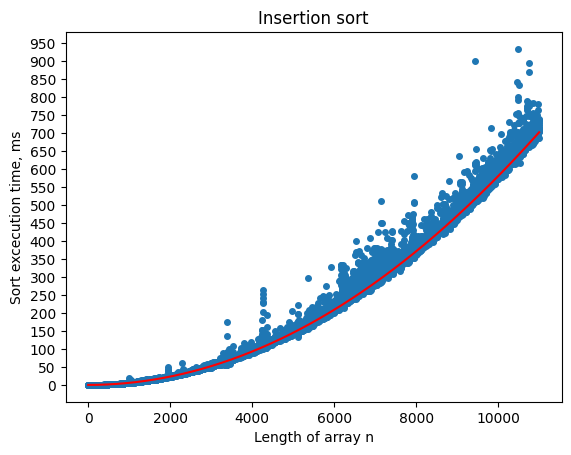

In [44]:
x = [n for n in range(1, 11000)]
y = [1000 * el for el in insertionsort_range]
x1 = np.arange(0, 11000, 0.1)
y1 = 5.8 * x1**2 / 1000000
plt.plot(x, y, marker='o', markersize=4, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 40
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Insertion sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Merge Sort Graph

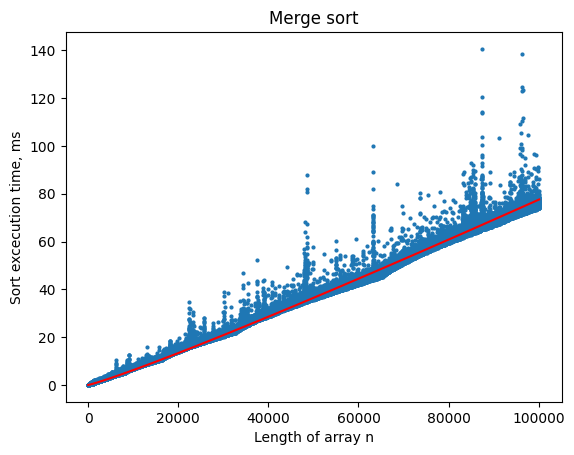

In [53]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in mergesort_range]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (2.15 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Merge sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Quick Sort Graph

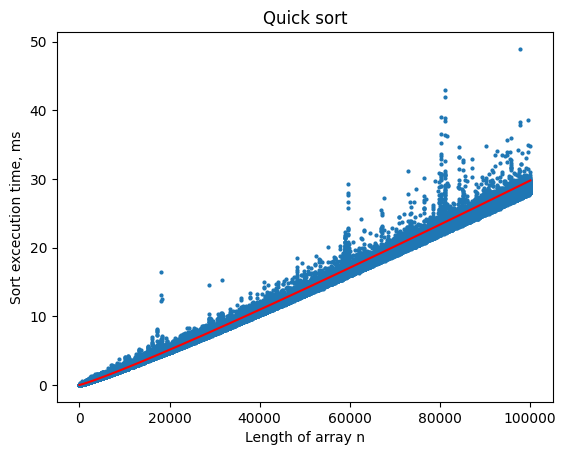

In [54]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in qsort_range]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (5.6 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Quick sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

# Heap Sort Graph

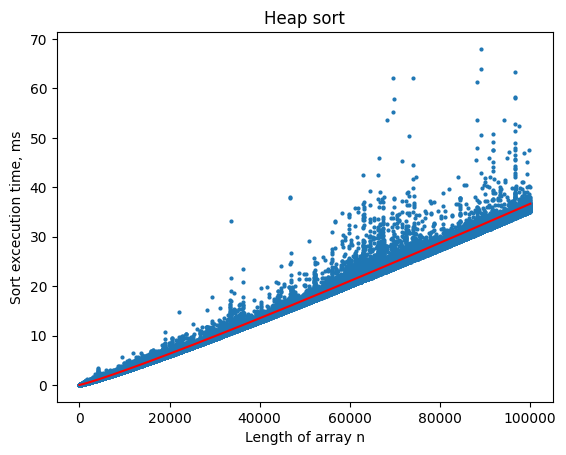

In [60]:
x = [n for n in range(1, 100100)]
y = [1000 * el for el in heapsort_range]
x1 = np.arange(1, 100100, 0.1)
y1 = x1 * np.log2(x1) / (4.55 * 1000 * np.log2(1000))
plt.plot(x, y, marker='o', markersize=2, linestyle=' ')
plt.plot(x1, y1, color='red')
desired_y_ticks = 10
plt.locator_params(axis='y', nbins=desired_y_ticks)
plt.plot()
plt.title('Heap sort')
plt.xlabel('Length of array n')
plt.ylabel('Sort excecution time, ms')
plt.show()

## Так как рассматривать все возможные варианты значений m и n - это очень долго, просто возьмём n in [10, 30, 80, 150, 400, 1500, 4000, 7000, 10000]; m in [1, 5, 10, 20, 45, 75, 100, 150, 200] 

In [ ]:
def sort5(a, b, c, d, e):
    'Sort 5 values with 7 Comparisons'
    if a < b:      a, b = b, a
    if c < d:      c, d = d, c
    if a < c:      a, b, c, d = c, d, a, b
    if e < c:
        if e < d:  pass
        else:      d, e = e, d
    else:
        if e < a:  c, d, e = e, c, d
        else:      a, c, d, e = e, a, c, d
    if b < d:
        if b < e:  return b, e, d, c, a
        else:      return e, b, d, c, a
    else:
        if b < c:  return e, d, b, c, a
        else:      return e, d, c, b, a
from itertools import permutations
assert all(list(sort5(*p)) == sorted(p) for p in permutations(range(5)))